In [1]:
#pandas using SQLite

In [7]:
import sqlite3
#create a connection object
conn = sqlite3.connect("C:\\Users\\admin\\Desktop\\exams\\python\\dataset\\flights.db")

In [8]:
#Create a cursor object
cur = conn.cursor()
#execute a sql query
cur.execute('select * from airlines limit 5;')
#fetch our records
results = cur.fetchall()
print(results)

[(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y'), (1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N'), (2, '3', '1Time Airline', '\\N', '1T', 'RNX', 'NEXTIME', 'South Africa', 'Y'), (3, '4', '2 Sqn No 1 Elementary Flying Training School', '\\N', None, 'WYT', None, 'United Kingdom', 'N'), (4, '5', '213 Flight Unit', '\\N', None, 'TFU', None, 'Russia', 'N')]


In [9]:
#Mapping airports
coords = cur.execute("""
  select cast(longitude as float), 
  cast(latitude as float) 
  from airports;"""
).fetchall()


C:\Users\admin\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\admin\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


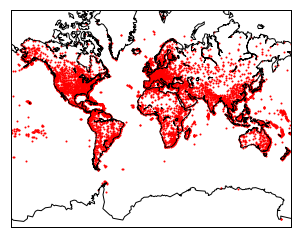

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib .pyplot as plt
%matplotlib inline

m = Basemap(projection='merc',llcrnrlat=-80 , urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c' )
m.drawcoastlines()
m.drawmapboundary()

x, y = m([l[0] for l in coords], [l[1] for l in coords])

m.scatter(x,y,1,marker='o',color='red')



In [12]:
import pandas as pd
#read our result
df= pd.read_sql_query('select * from airlines limit 5;',conn)
df

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N


In [13]:
#fetch all columns name
df['country']

0              None
1     United States
2      South Africa
3    United Kingdom
4            Russia
Name: country, dtype: object

In [14]:
df.columns

Index(['index', 'id', 'name', 'alias', 'iata', 'icao', 'callsign', 'country',
       'active'],
      dtype='object')

In [ ]:
#get top 10 rows
df.head(10)

In [ ]:
df.tail(10)

In [16]:
#Inserting rows using pandas
#cur = conn.cursor()
cur.execute("insert into airlines values(6048, 19846, 'Test Flight','','', null,null,null,'Y');")
conn.commit()
pd.read_sql_query('select * from airlines where id = 19846;',conn)

,index,id,name,alias,iata,icao,callsign,country,active
0,6048,19846,Test flight,,,None,None,None,Y
1,6048,19846,Test Flight,,,None,None,None,Y
